In [7]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.5/255.5 kB 1.9 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 6.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install scikit-learn  


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
import matplotlib.pyplot as plt
import random
import shutil
from pathlib import Path
from collections import Counter

from sklearn.model_selection import train_test_split


In [20]:
DATA_DIR = Path("../data")
CLASSES = [cls for cls in os.listdir(DATA_DIR) if not cls.startswith('.')]
CLASSES.sort()
print("Classes:", CLASSES)



Classes: ['mask_weared_incorrect', 'with_mask', 'without_mask']


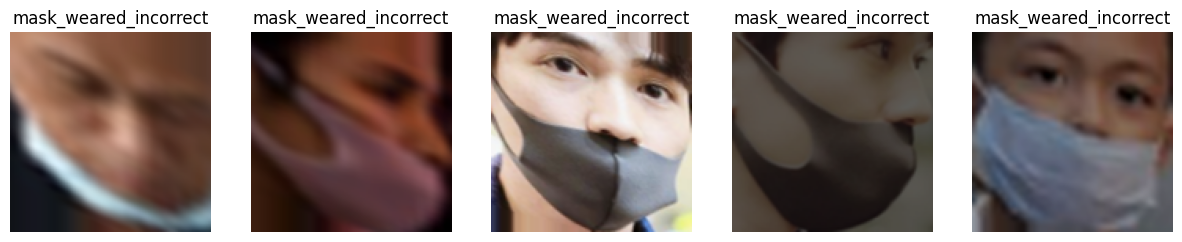

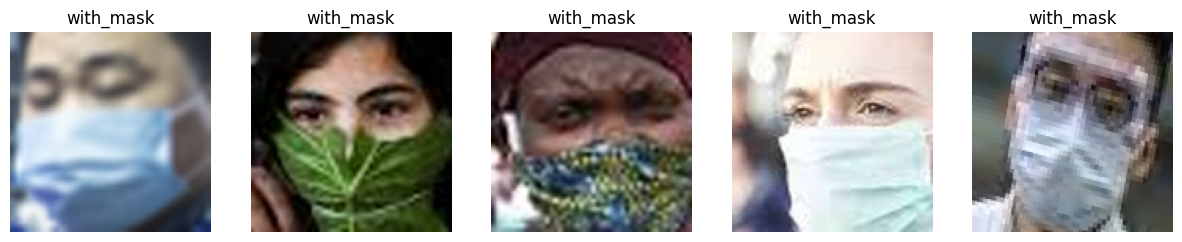

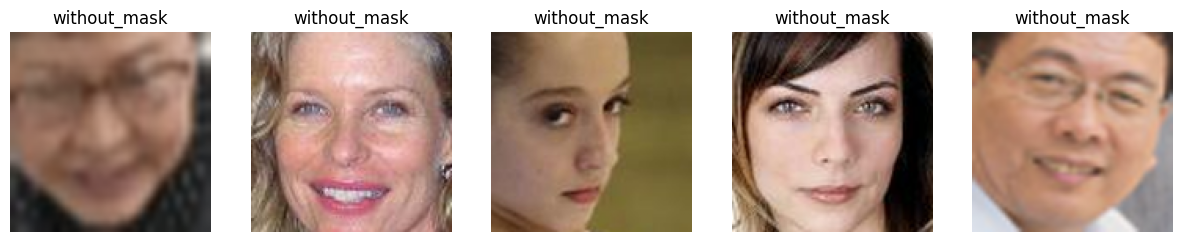

In [21]:
def show_images(class_name, num_images=5):
    class_dir = DATA_DIR / class_name
    images = os.listdir(class_dir)
    sample_imgs = random.sample(images, num_images)
    
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(sample_imgs):
        img_path = class_dir / img_name
        img = plt.imread(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)
    plt.show()

for cls in CLASSES:
    show_images(cls, num_images=5)


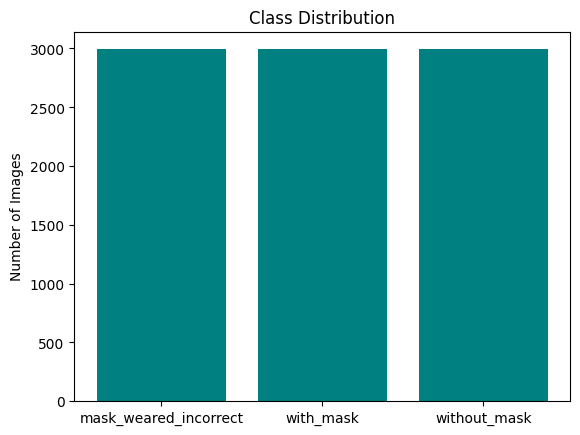

{'mask_weared_incorrect': 2994, 'with_mask': 2994, 'without_mask': 2994}


In [22]:
class_counts = {}
for cls in CLASSES:
    class_counts[cls] = len(os.listdir(DATA_DIR / cls))

plt.bar(class_counts.keys(), class_counts.values(), color='teal')
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

print(class_counts)


In [23]:
all_images = []
all_labels = []

for cls in CLASSES:
    img_dir = DATA_DIR / cls
    for img in os.listdir(img_dir):
        all_images.append(img_dir / img)
        all_labels.append(cls)

# First split train vs temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    all_images, all_labels, test_size=0.3, stratify=all_labels, random_state=42)

# Then split temp into val and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")


Train: 6287, Val: 1347, Test: 1348
